<img height=200 width=500 src="https://www.svm-tutorial.com/wp-content/uploads/2017/02/svms.png" />

## **Support Vector Machines (SVMs) are versatile algorithms used in various machine learning tasks. Here are scenarios where SVMs can be applied:**

### 1-Classification: SVMs are primarily used for classification tasks. They work well for both linear and non-linear classification by finding an optimal hyperplane that separates data into different classes.

### 2-Regression: SVMs can also perform regression tasks by finding a hyperplane that best fits the data, aiming to minimize the error between the predicted and actual values.

### 2-Text and Image Classification: SVMs have been successful in text classification tasks like sentiment analysis, spam detection, and document categorization. In image processing, they can be used for object recognition and image classification.

### 3-Outlier Detection: SVMs are effective in identifying outliers or anomalies in data by detecting observations that lie far from the hyperplane.

### 4-Feature Reduction: They can be employed for feature reduction, especially in cases where there are many features, as SVMs can handle high-dimensional data efficiently.

### 5-Small to Medium-Sized Datasets: SVMs perform well on small to medium-sized datasets. However, for very large datasets, their training time and computational requirements might become prohibitive. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings 
warnings.filterwarnings("ignore")

In [2]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df["target"]=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

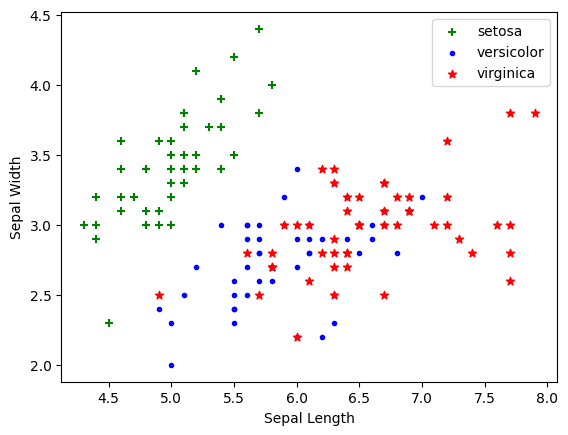

In [9]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green",marker='+' , label = iris.target_names[0])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.',  label = iris.target_names[1])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red", marker='*',  label = iris.target_names[2])
plt.legend()
plt.show()

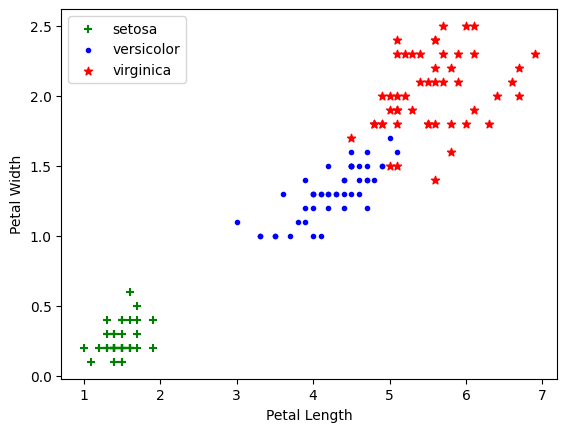

In [10]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green",marker='+' , label = iris.target_names[0])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.',  label = iris.target_names[1])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red", marker='*',  label = iris.target_names[2])
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns="target")
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
len(X_train)

120

In [15]:
len(X_test)

30

In [16]:
from sklearn.svm import SVC #support vector classifier (SVC) / support vector regressor (SVR)  
model = SVC()

In [17]:
model.fit(X_train,y_train)

SVC()

In [18]:
model.score(X_train, y_train)

0.975

In [19]:
model.score(X_test, y_test)

0.9333333333333333

## **Regularization Parameter** 

## 1-Parameter (C) 
### That's the sensitivity of model to the outliers 

<img height=600 width=900 src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-09-at-10.19.39-AM.png" />

In [20]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)

SVC(C=10)

In [21]:
print(model_C.score(X_train, y_train))
print(model_C.score(X_test, y_test))

0.9916666666666667
1.0


In [22]:
model_C2 = SVC(C=0.1)
model_C2.fit(X_train, y_train)

SVC(C=0.1)

In [23]:
print(model_C2.score(X_train, y_train))
print(model_C2.score(X_test, y_test))

0.925
0.8333333333333334


## 2-Gamma

<img height=1000 width=1300 src="https://i.imgur.com/lURJeuA.png" />

In [24]:
model_g = SVC(gamma=0.4)
model_g.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [25]:
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

## 2-Kernel

<img height=800 width=900 src="https://miro.medium.com/v2/resize:fit:800/1*zqEbdsAbN4QqDdJ6L5pjnw.png" />

In [26]:
model_linear_kernal = SVC(kernel = "rbf")
model_linear_kernal.fit(X_train, y_train)

SVC()

In [27]:
model_linear_kernal.score(X_test, y_test)

0.9333333333333333